In [29]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [30]:
import matplotlib.pyplot as plt

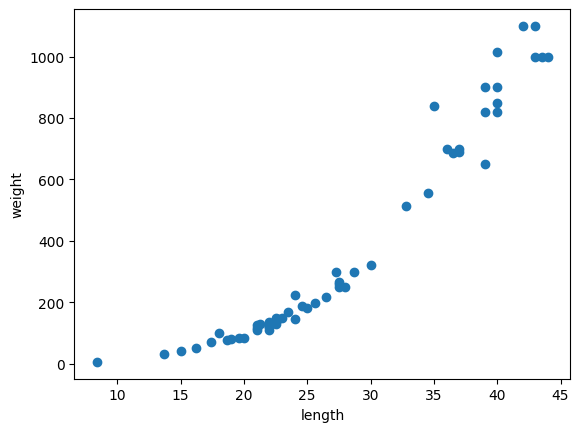

In [31]:
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
data = perch_length.reshape(-1,1)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_input, test_input, train_target, test_target = train_test_split(
    data, perch_weight, test_size=0.2, random_state=42
)

In [35]:
print(train_input.shape)
print(test_input.shape)
print(train_target.shape, test_target.shape)

(44, 1)
(12, 1)
(44,) (12,)


In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [37]:
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [38]:
# 학습 할 값이 적거나 복잡도가 떨어져서 과소 적합 상태
print("훈련세트 score:", knr.score(train_input, train_target))
print("테스트 세트 score:", knr.score(test_input, test_target))

훈련세트 score: 0.9699886106745992
테스트 세트 score: 0.9932626838364674


In [39]:
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [40]:

print("훈련세트 score:", knr.score(train_input, train_target))
print("테스트 세트 score:", knr.score(test_input, test_target))

훈련세트 score: 0.9803764248982696
테스트 세트 score: 0.9761346952012298


In [41]:
knr.predict([[38.0]])

array([720.])

In [51]:
knr.predict([[100.0]])

array([1033.33333333])

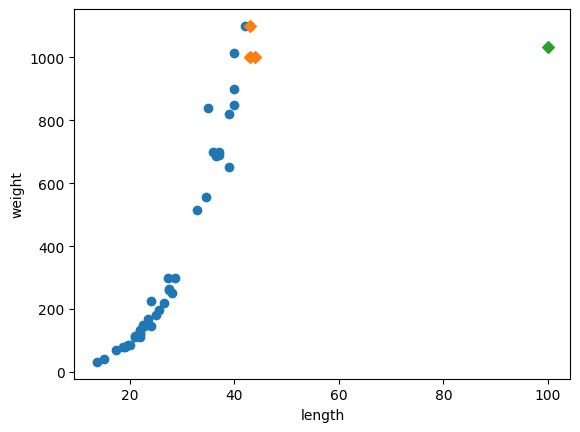

In [50]:
_, indexes = knr.kneighbors([[100]])
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(100,1033,marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [49]:
print(train_target[indexes])
print(np.mean(train_target[indexes]))

[[1000. 1100. 1000.]]
1033.3333333333333
